# Package import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import random
import timeit
import sklearn
import sklearn.model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
from functools import reduce
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
random.seed(9001) # For Reproducibility of Results
%matplotlib inline
pd.set_option('display.max_rows', 300)

# Data Load

In [2]:
#NOMIS - CENSUS DATA - DIMENSIONS
population = pd.read_csv('postcodeSector/populationCount.csv', skiprows=8) # 8039*8
ethnicMinority = pd.read_csv('postcodeSector/Ethnic.csv', skiprows=8)  # 8039*96
ageStructure = pd.read_csv('postcodeSector/ageStructure.csv', skiprows=8) #8039*20
relationalSituation = pd.read_csv('postcodeSector/relational.csv', skiprows=8) #8039*8
livingArrangements = pd.read_csv('postcodeSector/livingArrangements.csv', skiprows=8) #8039*9
householdComposition = pd.read_csv('postcodeSector/householdComposition.csv', skiprows=8) #8039*23
notInEmploymentDependencies = pd.read_csv('postcodeSector/notInEmploymentDependencies.csv', skiprows=8) #8039*10
loneParentDependencies = pd.read_csv('postcodeSector/loneParentDependencies.csv', skiprows=8)#8039*13
ethnicGroup = pd.read_csv('postcodeSector/ethnicGroup.csv', skiprows=8) #8039*25
industry = pd.read_csv('postcodeSector/industry.csv', skiprows=8)#8039*26
tenure = pd.read_csv('postcodeSector/tenure.csv', skiprows=8) #8039*8
hoursWorked = pd.read_csv('postcodeSector/hoursWorked.csv', skiprows=8) #8039*6
dwelling = pd.read_csv('postcodeSector/dwelling.csv', skiprows=8) #8039*5
englishProf = pd.read_csv('postcodeSector/englishProf.csv', skiprows=8) #8039*7
centralHeating = pd.read_csv('postcodeSector/centralHeating.csv', skiprows=8) #8039*9
passportHeld = pd.read_csv('postcodeSector/passportHeld.csv', skiprows=7) #8039*73
birthCountry = pd.read_csv('postcodeSector/birthCountry.csv', skiprows=8) #8039*9
religion = pd.read_csv('postcodeSector/religion.csv', skiprows=8) #8063*12
generalHealth = pd.read_csv('postcodeSector/generalHealth.csv', skiprows=8) #8039*7
yearLastWorked = pd.read_csv('postcodeSector/yearLastWorked.csv', skiprows=8) #8039*13
householdSize = pd.read_csv('postcodeSector/householdSize.csv', skiprows=8) #8039*10
carOrVanAvailability = pd.read_csv('postcodeSector/carOrVanAvailability.csv', skiprows=8) #8039*7
distanceTravelledtoWork = pd.read_csv('postcodeSector/distanceTravelledtoWork.csv', skiprows=8) #8039*14
methodofTraveltoWork = pd.read_csv('postcodeSector/methodofTraveltoWork.csv', skiprows=8) #8039*14
ageofArrival = pd.read_csv('postcodeSector/ageofArrival.csv', skiprows=8) #8039*19
lengthofResidence = pd.read_csv('postcodeSector/lengthofResidence.csv', skiprows=8) #8039*7
occupationType = pd.read_csv('postcodeSector/occupation.csv', skiprows=8) #8039*11
mainLanguage = pd.read_csv('postcodeSector/mainLanguage.csv', skiprows=8) #8039*105
bedrooms = pd.read_csv('postcodeSector/bedrooms.csv', skiprows=8) #8039*8
longTermDisability = pd.read_csv('postcodeSector/longTermDisability.csv', skiprows=8) #8039*5
economicActivity = pd.read_csv('postcodeSector/economicActivity.csv', skiprows=8) #8039*17
positionInCommunalEstablishment = pd.read_csv('postcodeSector/positionInCommunalEstablishment.csv', skiprows=8) #8039*5
accomType = pd.read_csv('postcodeSector/accomType.csv', skiprows=8) #8039*13
secondAddress = pd.read_csv('postcodeSector/secondAddress.csv', skiprows=8) #8039*6
formerIndustry = pd.read_csv('postcodeSector/formerIndustry.csv', skiprows=8) #8039*11
formerOccupation = pd.read_csv('postcodeSector/formerOccupation.csv', skiprows=8) #8039*12


religion = religion.drop(religion.index[-24:]) # line added due to notes at bottom of CSV

qualification = pd.read_csv('postcodeSector/qualification.csv', skiprows=8) #8039*14   # AS A PROPORTION ONLY 


# Set up classification problem

In [3]:
qualification.drop(qualification.columns[[1,2,3,4,5,7,8,9,10,11,12]], axis=1, inplace=True)
qualification = qualification.rename(index=str, columns={"Highest level of qualification: Level 4 qualifications and above": "target"})

In [4]:
qualification.quantile(0.7) # Check to see where 70 percent quartile is to setup class imbalance

target    33.2
Name: 0.7, dtype: float64

In [5]:
# Assign a 1 or a zero as a output depending on whether proportion of people have, or don't have a higher education degree
qualification['classification'] = np.where(qualification['target']>=35, 1, 0) 

#Check
values = qualification.groupby('classification').count()
values['perc']= values['target']/values['target'].sum()
values

,postcode sector,target,perc
classification,,,
0,5988,5988,0.74524
1,2047,2047,0.25476


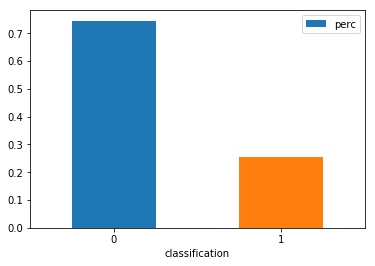

In [6]:
ax = values.plot.bar(y = 'perc',rot=0, )

# Combine datasets

In [7]:
###Merge different datasets
newDF = [population, ethnicMinority, ageStructure, relationalSituation, livingArrangements, householdComposition,notInEmploymentDependencies,loneParentDependencies,ethnicGroup,industry,tenure, hoursWorked,dwelling,englishProf,centralHeating,passportHeld,birthCountry,religion,generalHealth,yearLastWorked,householdSize,carOrVanAvailability,distanceTravelledtoWork,methodofTraveltoWork,ageofArrival,lengthofResidence,occupationType,mainLanguage,bedrooms,longTermDisability,economicActivity,positionInCommunalEstablishment,accomType,secondAddress,formerIndustry,formerOccupation,qualification]
newDF2 = pd.concat([i.set_index('postcode sector') for i in newDF],axis=1, join='outer')

In [8]:
#Check for dimensions
newDF2.shape

(8039, 735)

In [9]:
#drop rows without any information
newDF3 = newDF2.dropna()
newDF3.shape

(8035, 735)

In [10]:
#drop duplicate columns arising from merging...
newDF4 = newDF3.T.drop_duplicates().T

In [11]:
#remove spaces from variable names to allow access to columns
newDF4.columns = newDF4.columns.map(lambda x: x.replace(' ', '_'))

In [12]:
newDF4.shape

(8035, 706)

In [13]:
y = newDF4.classification

# TWO COMPONENT GRAPHICAL REPRESENTATION

In [14]:
#RUN LOOP OF ALL PARAMETERS
start_time = timeit.default_timer()


x = newDF4.drop(['target','classification'], axis=1)

x = StandardScaler().fit_transform(x)
#REDUCE DIMENSIONS
pca = PCA(n_components=2)
#FIT MODEL
principalComponents = pca.fit_transform(x)

principalDF = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDF.shape

y = y.to_frame().reset_index()



finalDF = y.join(principalDF)


finalDF.columns = finalDF.columns.map(lambda x: x.replace(' ', '_'))

finalDF.head()

,postcode_sector,classification,principal_component_1,principal_component_2
0,AL1 1,1,-3.808828,4.250334
1,AL1 2,1,-0.588977,3.547062
2,AL1 3,1,-5.790385,7.635122
3,AL1 4,1,7.005280,-1.652288
4,AL1 5,1,14.338116,2.143885


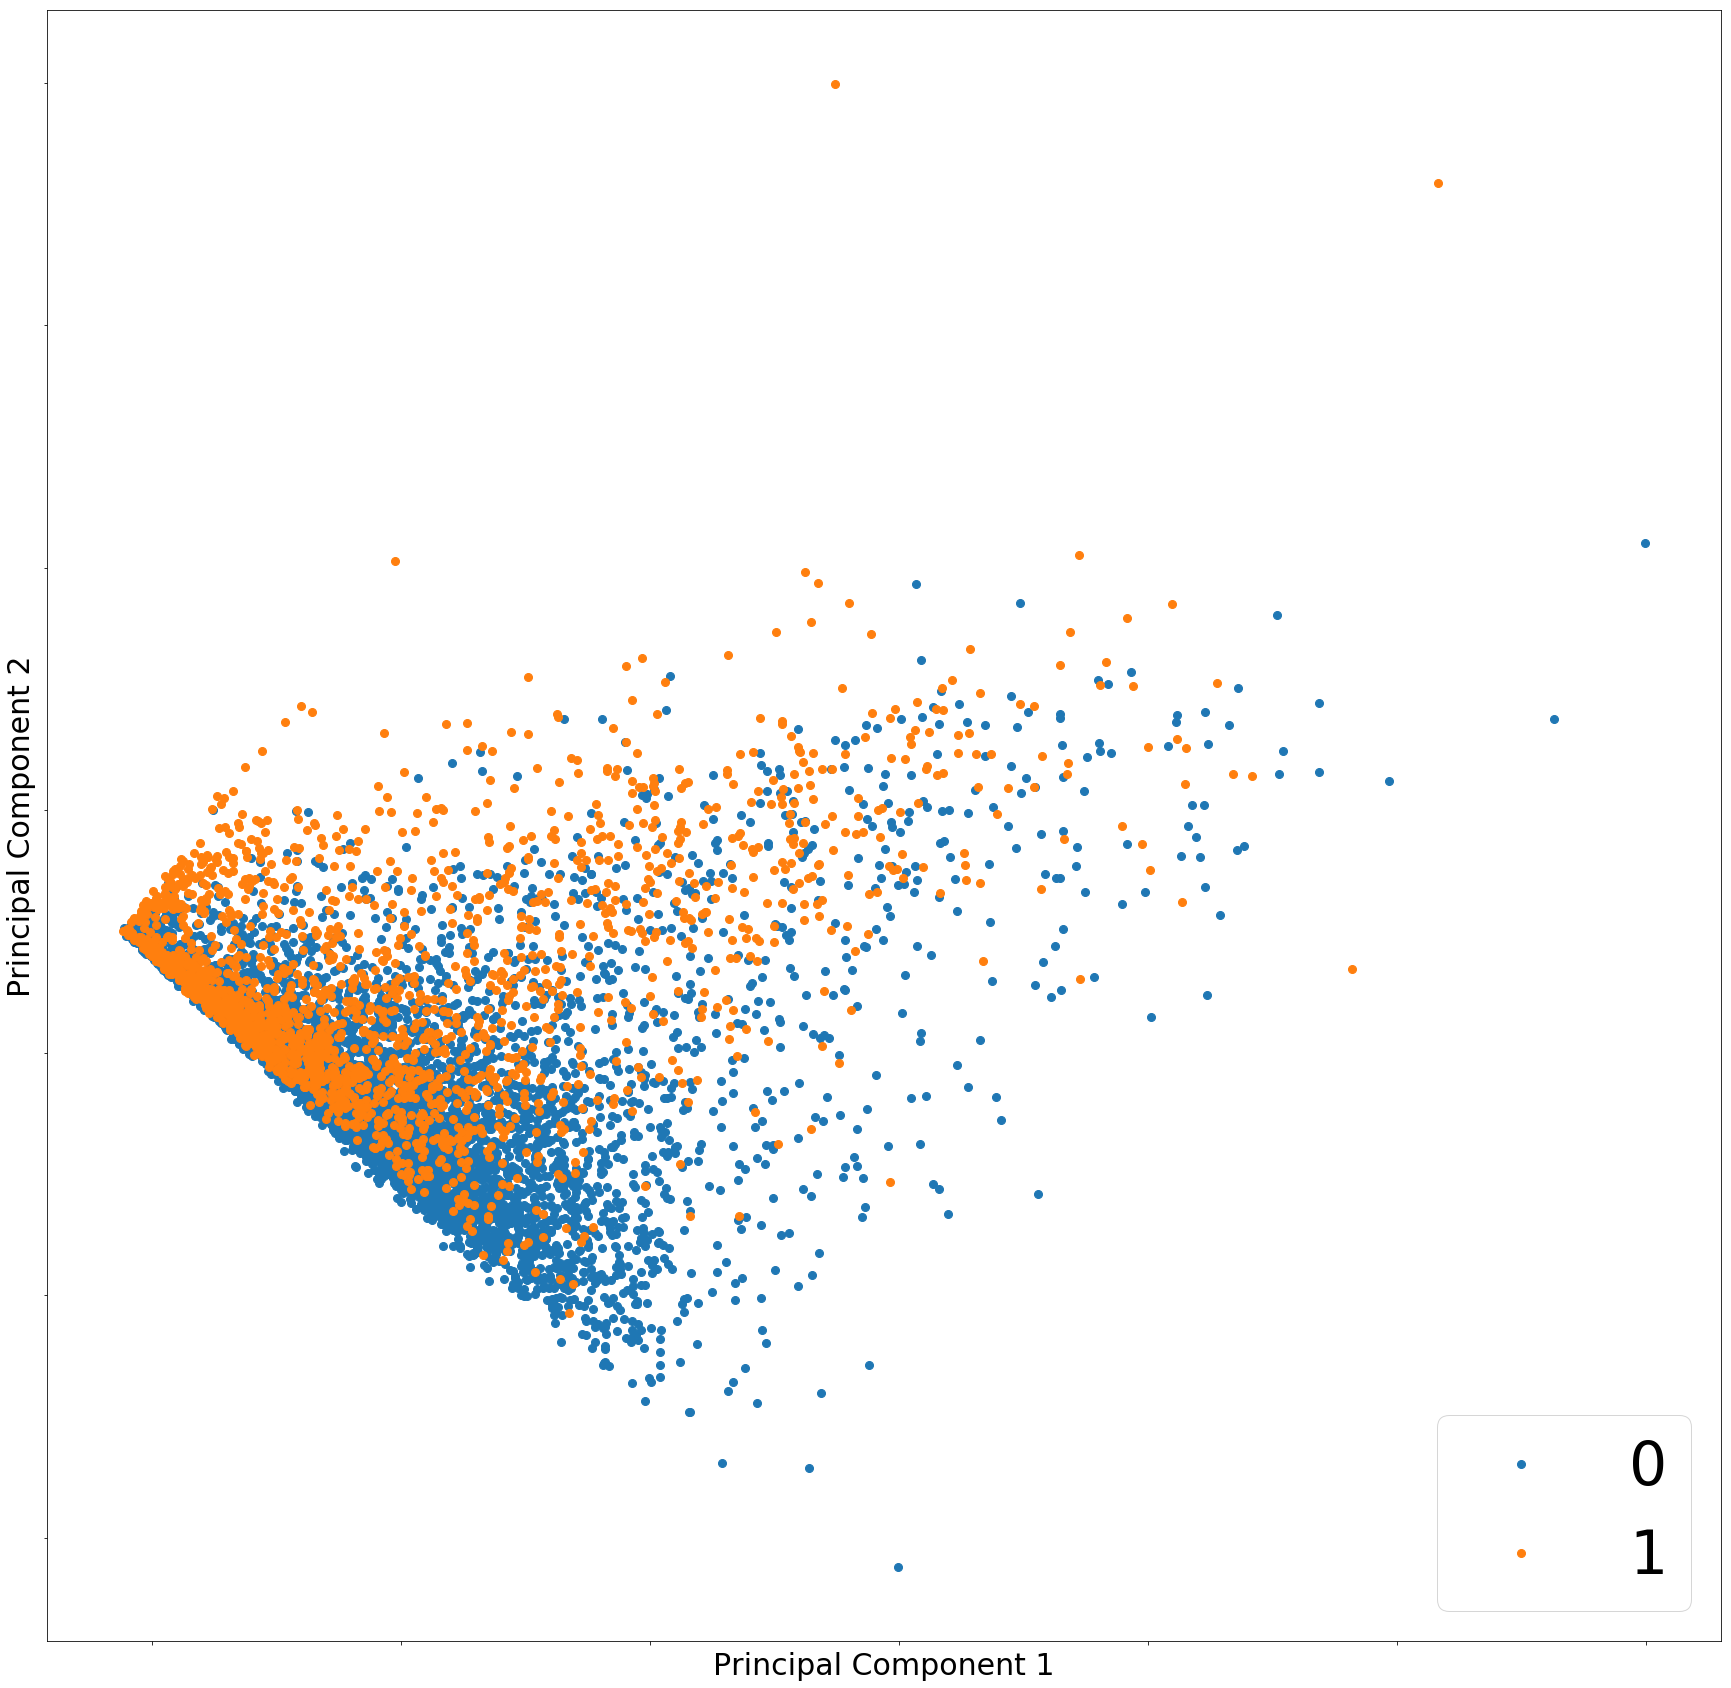

Time Elapsed:
0.9711644930628024


In [15]:
groups = finalDF.groupby('classification')

# Plot


fig, ax = plt.subplots()
fig.set_size_inches(30, 30)
for name, group in groups:
    ax.plot(group.principal_component_1, group.principal_component_2, marker='o', linestyle='', ms=8, label=name)
ax.legend()
ax.set_xlabel('Principal Component 1',fontsize=30)
ax.set_ylabel('Principal Component 2', fontsize=30)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.legend(loc=4, prop={'size': 60})
plt.show()
elapsed = timeit.default_timer() - start_time
print("Time Elapsed:")
print(elapsed)

# ONE COMPONENT GRAPHICAL REPRESENTATION

In [16]:
finalDF = finalDF.replace(finalDF.principal_component_1.values, finalDF.classification.values)
finalDF

,postcode_sector,classification,principal_component_1,principal_component_2
0,AL1 1,1,1.0,4.250334
1,AL1 2,1,1.0,3.547062
2,AL1 3,1,1.0,7.635122
3,AL1 4,1,1.0,-1.652288
4,AL1 5,1,1.0,2.143885
5,AL10 0,0,0.0,2.277536
6,AL10 8,0,0.0,3.240524
7,AL10 9,0,0.0,15.420308
8,AL2 1,0,0.0,-0.064289
9,AL2 2,0,0.0,0.876325


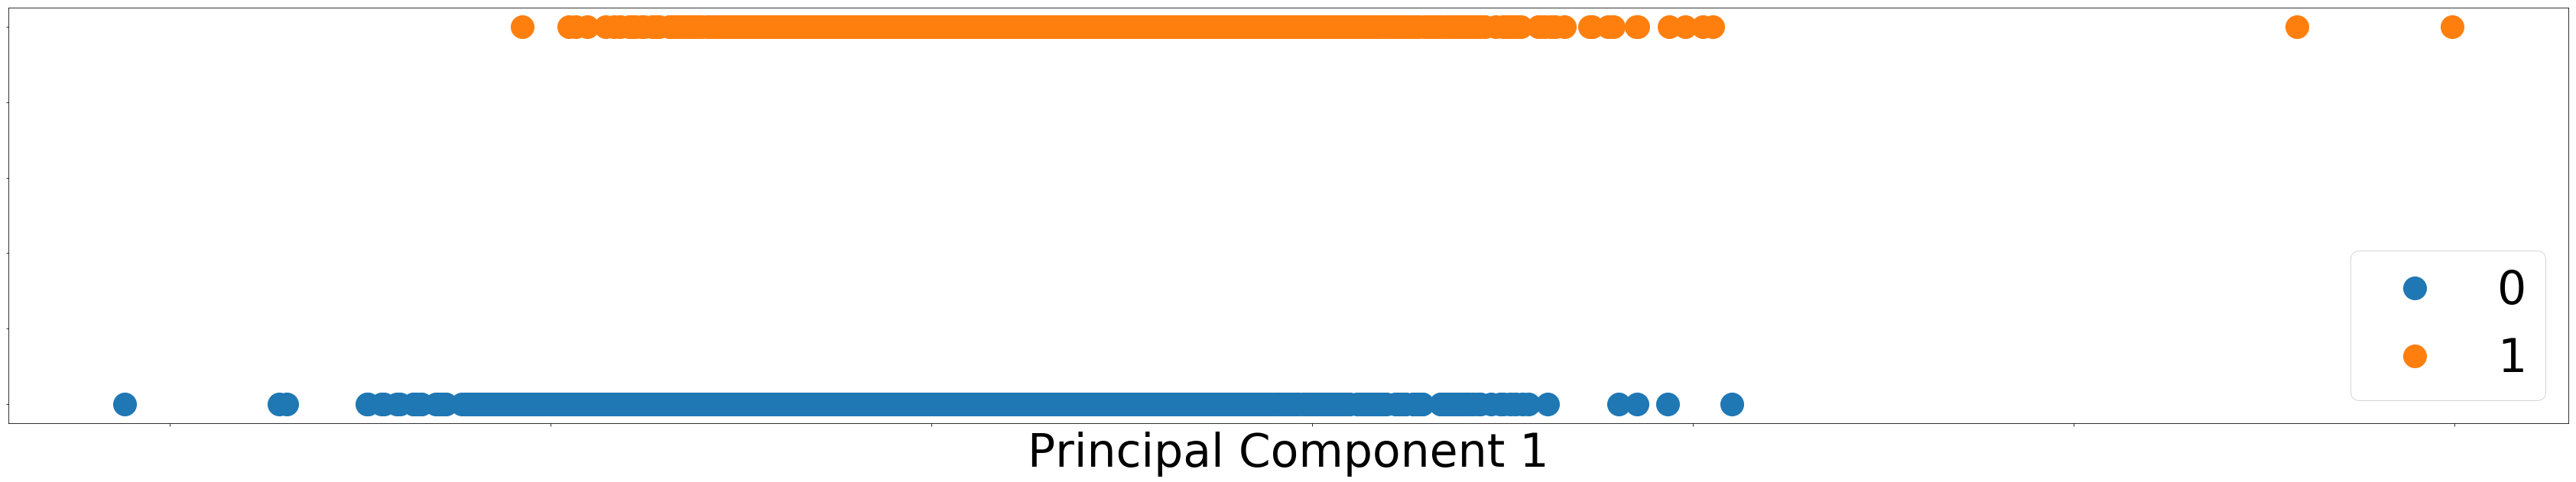

In [19]:
groups = finalDF.groupby('classification')

# Plot 

fig, ax = plt.subplots()
fig.set_size_inches(60, 10)
for name, group in groups:
    ax.plot(group.principal_component_2, group.principal_component_1, marker='o', linestyle='', ms=30, label=name)
ax.legend()
ax.set_xlabel('Principal Component 1',fontsize=60)
plt.legend(loc=4, prop={'size': 60})
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()